# 1. Import Required Modules

In [24]:
!pip install numpy

You should consider upgrading via the 'c:\users\91920\anaconda3\python.exe -m pip install --upgrade pip' command.


In [25]:
!pip install pandas

You should consider upgrading via the 'c:\users\91920\anaconda3\python.exe -m pip install --upgrade pip' command.


In [6]:
# importing required modules
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# 2. Import Dataset

In [7]:
# importing the dataset
dataset = pd.read_csv('C:\\Users\\91920\\Downloads\\emails.csv', encoding='latin-1')
dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [8]:
# count observations in each label
dataset.spam.value_counts()

0    4360
1    1368
Name: spam, dtype: int64

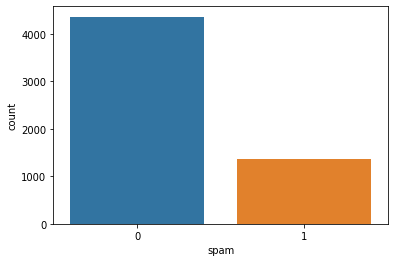

In [10]:
sns.countplot(dataset['spam'])

      text
spam      
0     4360
1     1368


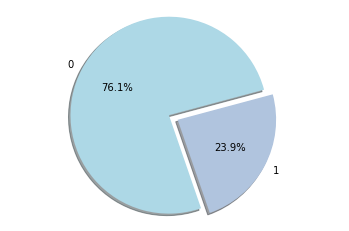

In [23]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
title_type = dataset.groupby('spam').agg('count')
print(title_type)
my_labels = '0','1'
my_colors = ['lightblue','lightsteelblue']
my_explode = (0, 0.1)
plt.pie(title_type, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.axis('equal')
plt.show()

# 3. Train Test Split

In [26]:
!pip install sklearn

You should consider upgrading via the 'c:\users\91920\anaconda3\python.exe -m pip install --upgrade pip' command.


In [11]:
# for splitting dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset["text"],dataset["spam"], test_size = 0.4, random_state = 10)

In [12]:
print(X_train.shape, " " ,X_test.shape )
print(y_train.shape, " " ,y_test.shape)


(3436,)   (2292,)
(3436,)   (2292,)


# 4. Convert words to vectors

In [13]:
# for vectorizing words
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vect = CountVectorizer(stop_words='english')
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [15]:
print(vect.get_feature_names()[0:20])


['00', '000', '0000', '00000000', '000000000003619', '000000000003991', '000000000003997', '000000000005168', '000000000005411', '000000000005820', '000000000006238', '000000000007494', '000000000007498', '000000000007876', '000000000010552', '000000000011185', '000000000012735', '000000000012736', '000000000012738', '000000000013085']


In [16]:
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)
type(X_test_df)

scipy.sparse.csr.csr_matrix

# 5. Machine Learning model

In [17]:
prediction = dict()
# Naive Bayes Machine Learning Model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
prediction["naive_bayes"] = model.predict(X_test_df)

# 6. Check performance of the model

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [20]:
# get accuracy
accuracy_score(y_test,prediction["naive_bayes"])

0.9925828970331588

In [21]:
print(classification_report(y_test, prediction['naive_bayes'], target_names = ["Ham", "Spam"]))

              precision    recall  f1-score   support

         Ham       0.99      1.00      1.00      1724
        Spam       0.99      0.98      0.98       568

    accuracy                           0.99      2292
   macro avg       0.99      0.99      0.99      2292
weighted avg       0.99      0.99      0.99      2292



[[1719    5]
 [  12  556]]


Text(0.5, 1, 'Confusion Matrix')

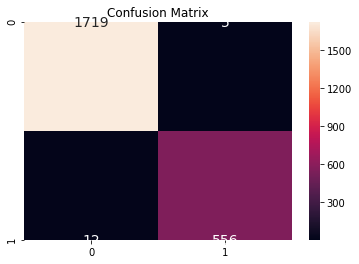

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix as cm
cm1 = cm(y_test, prediction['naive_bayes'])
print(cm1)
sns.heatmap(cm1,annot=True,annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')